# Household Energy Usage Analysis

# Importing necessary libraries and model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score

# Step 2: Load and Preprocess Data


In [2]:
#loading the dataset.
df = pd.read_table('household_power_consumption.txt',sep=';')
df

C:\Users\yash pc\AppData\Local\Temp\ipykernel_23804\740972143.py:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table('household_power_consumption.txt',sep=';')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [3]:
# checking rows and columns
df.shape

(2075259, 9)

In [4]:
# df.to_csv("main.csv")

In [5]:
df1=pd.read_csv("main.csv")
df1.shape

C:\Users\yash pc\AppData\Local\Temp\ipykernel_23804\1791801910.py:1: DtypeWarning: Columns (3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv("main.csv")


(2075259, 10)

In [6]:
df=df1

In [7]:
df.shape

(2075259, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 10 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   Date                   object 
 2   Time                   object 
 3   Global_active_power    object 
 4   Global_reactive_power  object 
 5   Voltage                object 
 6   Global_intensity       object 
 7   Sub_metering_1         object 
 8   Sub_metering_2         object 
 9   Sub_metering_3         float64
dtypes: float64(1), int64(1), object(8)
memory usage: 158.3+ MB


In [9]:
df.isnull().sum()

Unnamed: 0                   0
Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [10]:
df.drop(columns="Unnamed: 0",inplace=True)

In [11]:
df.Sub_metering_1.value_counts()

Sub_metering_1
0.000    1840611
1.000      82920
0.0        39564
?          25979
2.000      18537
          ...   
72.0           1
81.0           1
76.0           1
63.0           1
57.0           1
Name: count, Length: 153, dtype: int64

In [12]:
df.Sub_metering_2.value_counts()

Sub_metering_2
0.000    1408274
1.000     367317
2.000     153938
0.0        28556
?          25979
          ...   
61.0           1
60.0           1
56.0           1
51.0           1
15.0           1
Name: count, Length: 145, dtype: int64

In [13]:
df[df["Sub_metering_1"]=="?"]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,?,?,?,?,?,?,NaN
6840,21/12/2006,11:24:00,?,?,?,?,?,?,NaN
19724,30/12/2006,10:08:00,?,?,?,?,?,?,NaN
19725,30/12/2006,10:09:00,?,?,?,?,?,?,NaN
41832,14/1/2007,18:36:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...,...
1990185,28/9/2010,19:09:00,?,?,?,?,?,?,NaN
1990186,28/9/2010,19:10:00,?,?,?,?,?,?,NaN
1990187,28/9/2010,19:11:00,?,?,?,?,?,?,NaN
1990188,28/9/2010,19:12:00,?,?,?,?,?,?,NaN


In [14]:
df.dropna(inplace=True)

In [15]:
df.shape

(2049280, 9)

In [16]:
print(df.Sub_metering_1.value_counts())
print(df.Sub_metering_2.value_counts())
print(df.Sub_metering_3.value_counts())

Sub_metering_1
0.000     1840611
1.000       82920
0.0         39564
2.000       18537
38.000      15954
           ...   
60.0            1
81.0            1
76.0            1
63.0            1
57.0            1
Name: count, Length: 152, dtype: int64
Sub_metering_2
0.000    1408274
1.000     367317
2.000     153938
0.0        28556
1.0        10907
          ...   
56.0           1
54.0           1
61.0           1
51.0           1
15.0           1
Name: count, Length: 144, dtype: int64
Sub_metering_3
0.0     852092
1.0     471868
18.0    353163
17.0    156593
19.0    121326
12.0     16726
16.0     15831
11.0     11282
29.0      6931
13.0      5339
20.0      4670
28.0      4364
10.0      3309
30.0      3119
9.0       2011
6.0       1993
2.0       1970
7.0       1954
3.0       1935
8.0       1922
4.0       1913
5.0       1899
27.0      1337
26.0       771
21.0       726
23.0       714
22.0       700
25.0       689
24.0       664
15.0       653
14.0       538
31.0       278
Name: count,

In [17]:
df['Date'] = df['Date'].astype(str)
df['Time'] = df['Time'].astype(str)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2049280 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 156.3+ MB


In [19]:
df['Date']

0          16/12/2006
1          16/12/2006
2          16/12/2006
3          16/12/2006
4          16/12/2006
              ...    
2075254    26/11/2010
2075255    26/11/2010
2075256    26/11/2010
2075257    26/11/2010
2075258    26/11/2010
Name: Date, Length: 2049280, dtype: object

In [20]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='mixed',dayfirst=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2049280 entries, 0 to 2075258
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   object        
 1   Time                   object        
 2   Global_active_power    object        
 3   Global_reactive_power  object        
 4   Voltage                object        
 5   Global_intensity       object        
 6   Sub_metering_1         object        
 7   Sub_metering_2         object        
 8   Sub_metering_3         float64       
 9   Datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 172.0+ MB


In [22]:
# Convert numeric columns to proper types
numeric_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 
                'Global_intensity', 'Sub_metering_1', 'Sub_metering_2','Sub_metering_3']

In [23]:
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2049280 entries, 0 to 2075258
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   object        
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
 9   Datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 172.0+ MB


In [25]:
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Hour'] = df['Datetime'].dt.hour
df['Minute'] = df['Datetime'].dt.minute
df['Weekday'] = df['Datetime'].dt.day_name()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2049280 entries, 0 to 2075258
Data columns (total 16 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   object        
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
 9   Datetime               datetime64[ns]
 10  Year                   int32         
 11  Month                  int32         
 12  Day                    int32         
 13  Hour                   int32         
 14  Minute                 int32         
 15  Weekday                object        
dtypes: datetime64[ns](1), float64(7), int32(5), object(3)
memory usage: 226.7+ MB


In [27]:
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
Year                     0
Month                    0
Day                      0
Hour                     0
Minute                   0
Weekday                  0
dtype: int64

In [28]:
# df.to_csv("final_dataset.csv")

In [29]:
df=pd.read_csv("final_dataset.csv")

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 17 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   Date                   object 
 2   Time                   object 
 3   Global_active_power    float64
 4   Global_reactive_power  float64
 5   Voltage                float64
 6   Global_intensity       float64
 7   Sub_metering_1         float64
 8   Sub_metering_2         float64
 9   Sub_metering_3         float64
 10  Datetime               object 
 11  Year                   int64  
 12  Month                  int64  
 13  Day                    int64  
 14  Hour                   int64  
 15  Minute                 int64  
 16  Weekday                object 
dtypes: float64(7), int64(6), object(4)
memory usage: 265.8+ MB


In [31]:
df.drop(columns="Unnamed: 0",inplace=True)

In [32]:
df["Datetime"]=pd.to_datetime(df["Datetime"])

In [33]:
# Calculate the proportion of energy contributed by each sub-metering:
df['Sub_metering_total'] = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']
df['Other_energy'] = df['Global_active_power'] * 1000 / 60 - df['Sub_metering_total']

In [34]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Year,Month,Day,Hour,Minute,Sub_metering_total,Other_energy
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2049280,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,2008-12-02 00:59:44.397740544,2.008425e+03,6.454433e+00,1.571245e+01,1.150391e+01,2.950043e+01,8.878891e+00,9.314693e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,2006-12-16 17:24:00,2.006000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2007-12-10 05:37:45,2.007000e+03,3.000000e+00,8.000000e+00,5.000000e+00,1.500000e+01,0.000000e+00,3.800000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2008-11-30 01:22:30,2.008000e+03,6.000000e+00,1.600000e+01,1.200000e+01,3.000000e+01,1.000000e+00,5.500000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,2009-11-23 20:31:15,2.009000e+03,9.000000e+00,2.300000e+01,1.800000e+01,4.500000e+01,1.800000e+01,1.036667e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,2010-11-26 21:02:00,2.010000e+03,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,1.340000e+02,1.248333e+02
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00,NaN,1.124388e+00,3.423209e+00,8.801670e+00,6.925189e+00,1.731790e+01,1.286300e+01,9.585916e+00


# Step 3: EDA (Exploratory Data Analysis)

In [35]:
a=df.set_index('Datetime').resample('M')['Global_active_power'].mean()

<Axes: title={'center': 'Monthly Energy Consumption'}, xlabel='Datetime'>

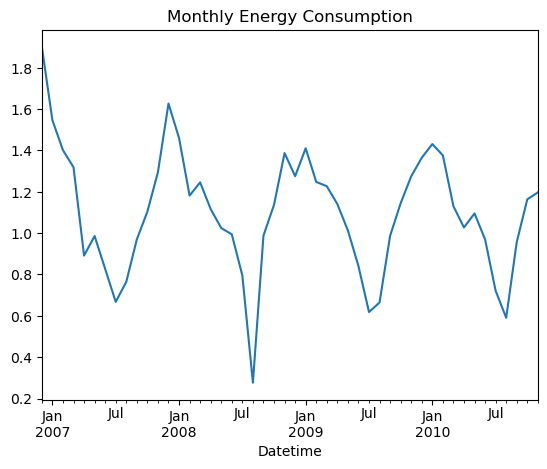

In [36]:
df.set_index('Datetime').resample('M')['Global_active_power'].mean().plot(title="Monthly Energy Consumption")

<Axes: xlabel='Hour'>

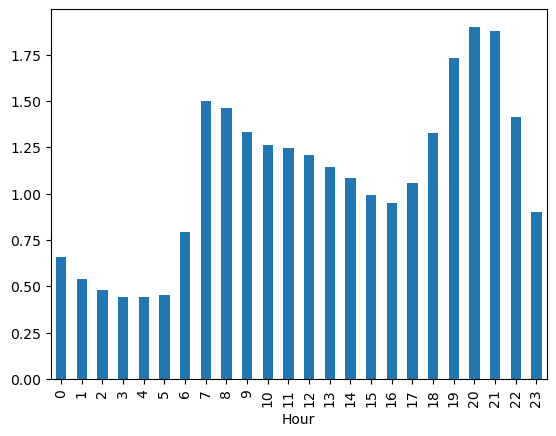

In [37]:
# Hourly: Identify peak hours of energy usage
df.groupby('Hour')['Global_active_power'].mean().plot(kind='bar')

In [38]:
# Categorize Days into Weekdays and Weekends

# Ensure Datetime is the index or column in the dataset
df['Weekday'] = df['Datetime'].dt.dayofweek  # 0=Monday, ..., 6=Sunday

# Classify into Weekday (True) or Weekend (False)
df['Is_Weekend'] = df['Weekday'] >= 5  # Weekend = Saturday(5) and Sunday(6)

In [39]:
# Calculate the average (or sum) of energy usage for weekdays and weekends.
# Group by Is_Weekend and calculate mean energy usage
weekday_vs_weekend = df.groupby('Is_Weekend')['Global_active_power'].mean()

print(weekday_vs_weekend)

Is_Weekend
False    1.035472
True     1.234232
Name: Global_active_power, dtype: float64


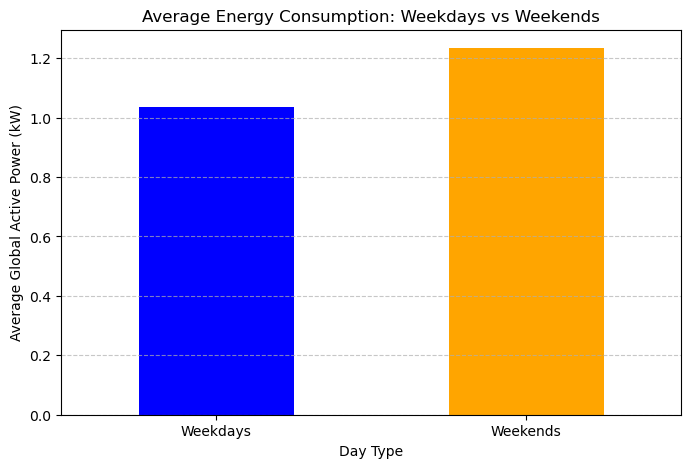

In [40]:
# Create a bar chart to compare average energy usage between weekdays and weekends.
# Bar plot for comparison
weekday_vs_weekend.plot(kind='bar', color=['blue', 'orange'], figsize=(8, 5))

plt.title('Average Energy Consumption: Weekdays vs Weekends')
plt.xticks(ticks=[0, 1], labels=['Weekdays', 'Weekends'], rotation=0)
plt.ylabel('Average Global Active Power (kW)')
plt.xlabel('Day Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

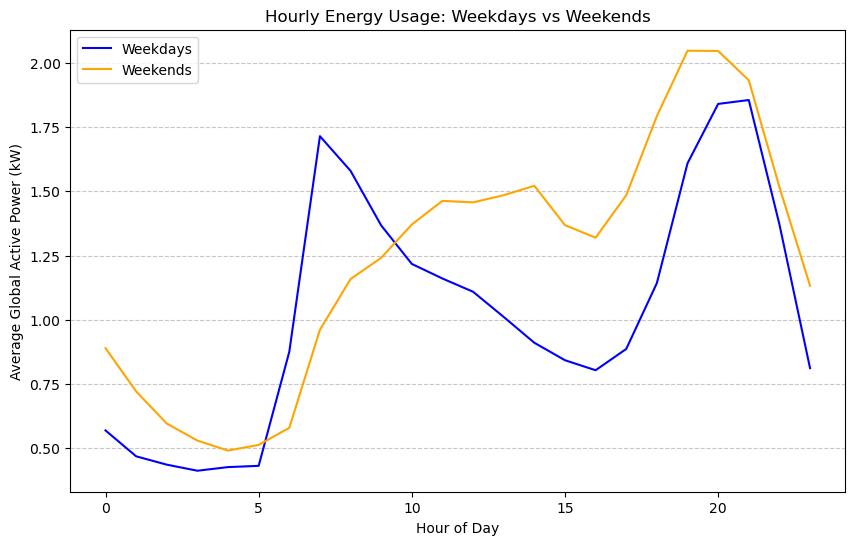

In [41]:
# To explore differences in hourly patterns between weekdays and weekends:
# Add Hour column if not already present
df['Hour'] = df['Datetime'].dt.hour

# Group by Is_Weekend and Hour, and calculate mean energy usage
hourly_usage = df.groupby(['Is_Weekend', 'Hour'])['Global_active_power'].mean().unstack(level=0)

# Plot hourly usage for Weekdays and Weekends
hourly_usage.plot(figsize=(10, 6), color=['blue', 'orange'])

plt.title('Hourly Energy Usage: Weekdays vs Weekends')
plt.xlabel('Hour of Day')
plt.ylabel('Average Global Active Power (kW)')
plt.legend(['Weekdays', 'Weekends'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [42]:
# Explore relationships between variables like Global_active_power, Voltage, and Global_intensity.
df1=df[['Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Datetime', 'Year', 'Month', 'Day', 'Hour', 'Minute',
       'Weekday', 'Sub_metering_total', 'Other_energy', 'Is_Weekend']]
df1.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Year,Month,Day,Hour,Minute,Weekday,Sub_metering_total,Other_energy,Is_Weekend
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555,-0.041838,-0.034328,-0.032654,0.002052,0.281602,0.002422,0.065813,0.847252,0.701380,0.084633
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617,0.053472,0.047018,0.027211,0.000674,0.127892,0.000186,0.069531,0.180690,0.211624,0.088927
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172,0.249370,0.254623,-0.015191,0.023525,-0.176050,0.009733,-0.021412,-0.345416,-0.271371,-0.021743
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543,-0.045805,-0.038621,-0.031417,0.001447,0.281972,0.002354,0.067210,0.844330,0.703258,0.086542
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571,-0.014364,-0.012557,-0.007513,-0.005312,0.108491,-0.000543,0.052961,0.570398,0.125067,0.065175
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872,-0.037956,-0.035939,-0.009763,0.003657,0.087210,-0.002127,0.031836,0.531840,0.085201,0.042660
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000,0.054291,0.062396,-0.030791,-0.000799,0.113873,-0.000419,0.013536,0.741593,0.178724,0.018087
Datetime,-0.041838,0.053472,0.249370,-0.045805,-0.014364,-0.037956,0.054291,1.000000,0.967792,0.160557,-0.005535,-0.000066,0.000023,-0.002526,0.011561,-0.092423,-0.004219
Year,-0.034328,0.047018,0.254623,-0.038621,-0.012557,-0.035939,0.062396,0.967792,1.000000,-0.092194,-0.031789,-0.000785,-0.000009,-0.002726,0.018654,-0.088137,-0.004834
Month,-0.032654,0.027211,-0.015191,-0.031417,-0.007513,-0.009763,-0.030791,0.160557,-0.092194,1.000000,0.018988,0.000011,0.000010,0.000241,-0.028210,-0.022174,0.002181


In [43]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Datetime', 'Year', 'Month', 'Day', 'Hour', 'Minute',
       'Weekday', 'Sub_metering_total', 'Other_energy', 'Is_Weekend'],
      dtype='object')

# Step 4: Feature Engineering

C:\Users\yash pc\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\yash pc\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


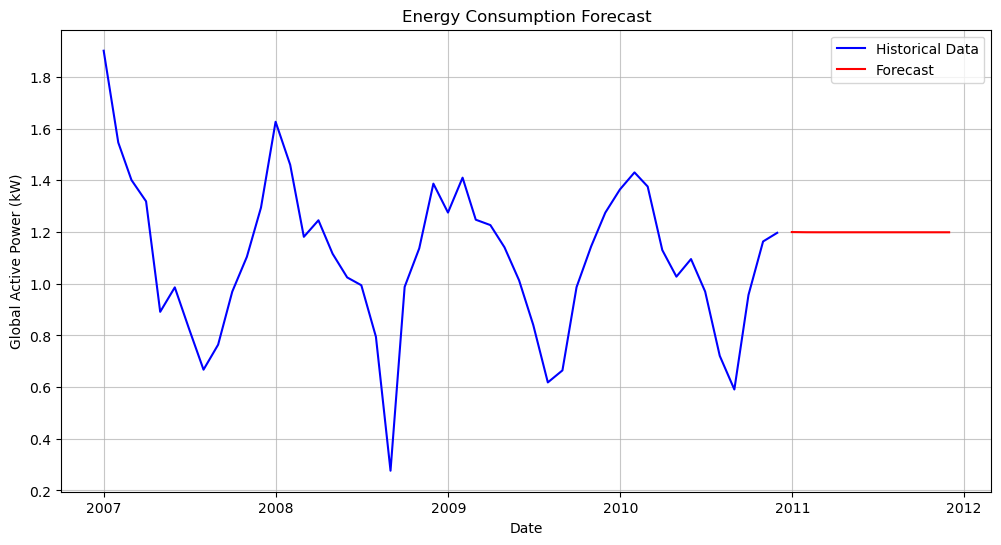

In [44]:
# ARIMA Model for Forecasting
# ARIMA model (order can be adjusted based on data analysis)
model = ARIMA(a, order=(2, 1, 2))  # Order: (p, d, q)
model_fit = model.fit()

# Forecast next 12 months
forecast = model_fit.forecast(steps=12)

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(a, label='Historical Data', color='blue')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Energy Consumption Forecast')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.grid(alpha=0.7)
plt.show()


In [45]:
# SARIMAX Model for Forecasting
# SARIMAX model (order can be adjusted based on data analysis)
# Define SARIMAX model (p, d, q)x(P, D, Q, s)
# (p, d, q): Non-seasonal ARIMA order
# (P, D, Q, s): Seasonal order and period
model = SARIMAX(a, order=(2, 1, 2), seasonal_order=(1, 1, 1, 12))  # Adjust as per your data
model_fit = model.fit()

# Forecast next 12 months
forecast = model_fit.forecast(steps=12)


C:\Users\yash pc\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\yash pc\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


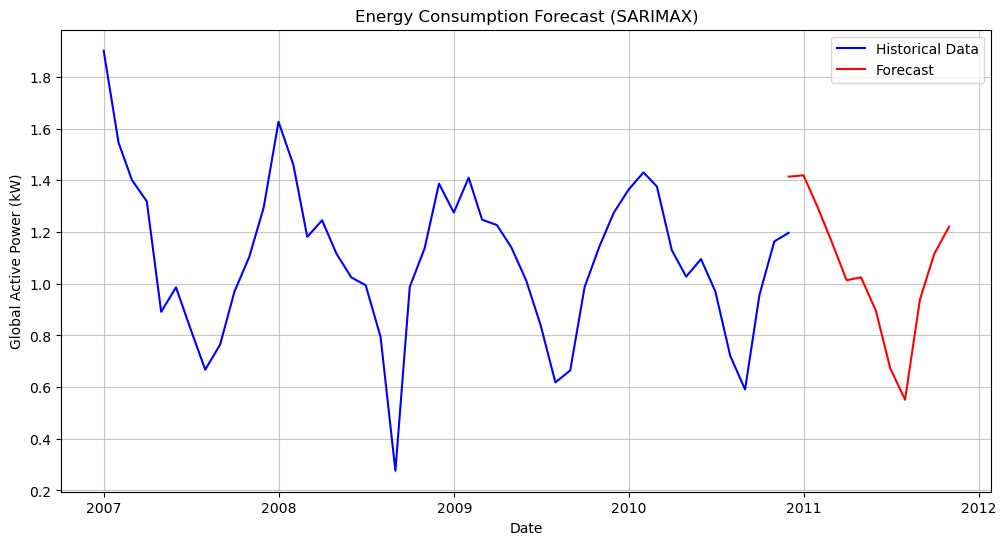

In [46]:
# Plot the historical data and forecast
plt.figure(figsize=(12, 6))
plt.plot(a, label='Historical Data', color='blue')
plt.plot(pd.date_range(start=a.index[-1], periods=12, freq='M'), forecast, label='Forecast', color='red')
plt.title('Energy Consumption Forecast (SARIMAX)')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.legend()
plt.grid(alpha=0.7)
plt.show()

In [47]:
# Detecting Outliers in Energy Usage
# Calculate Z-scores for energy usage
df['Z_Score'] = (df['Global_active_power'] - df['Global_active_power'].mean()) / df['Global_active_power'].std()

# Identify outliers (Z-score > 3 or < -3)
outliers = df[abs(df['Z_Score']) > 3]

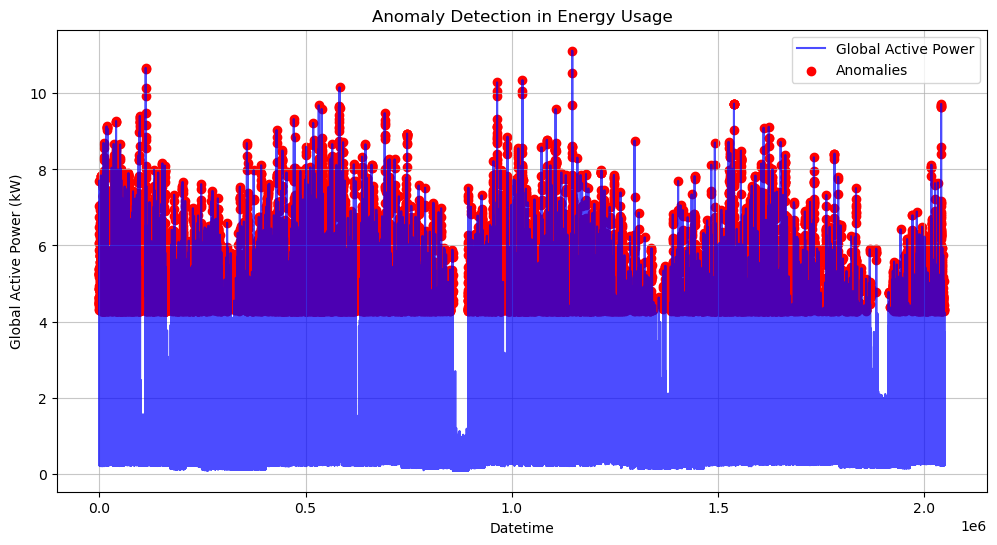

In [48]:
# Plot outliers
plt.figure(figsize=(12, 6))
plt.plot(df['Global_active_power'], label='Global Active Power', color='blue', alpha=0.7)
plt.scatter(outliers.index, outliers['Global_active_power'], color='red', label='Anomalies')
plt.title('Anomaly Detection in Energy Usage')
plt.ylabel('Global Active Power (kW)')
plt.xlabel('Datetime')
plt.legend()
plt.grid(alpha=0.7)
plt.show()

In [49]:
# Compute correlation matrix
correlation_matrix = df[['Global_active_power',
       'Global_reactive_power', 'Voltage', 'Global_intensity',
       'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Datetime',
       'Year', 'Month', 'Day', 'Hour', 'Minute', 'Weekday',
       'Sub_metering_total', 'Other_energy', 'Is_Weekend']].corr()



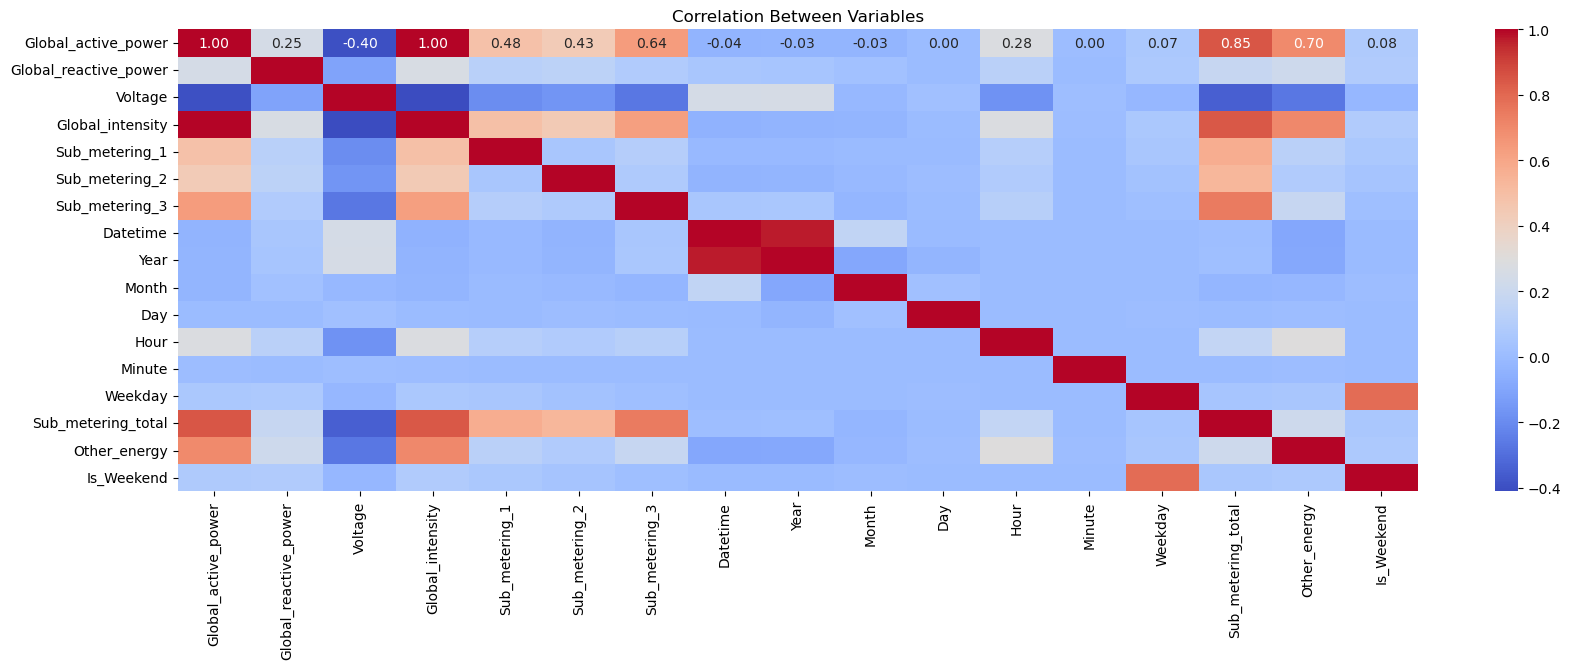

In [50]:
# Heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Variables')
plt.show()

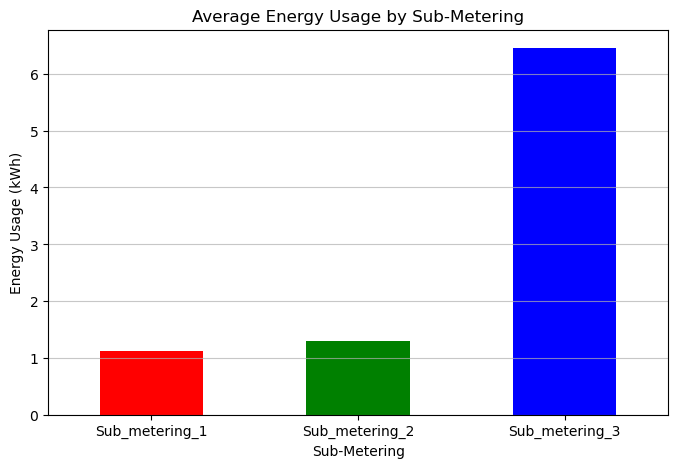

In [51]:
# Appliance-Level Energy Usage
# Compare sub-metering energy usage
sub_metering_cols = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
df[sub_metering_cols].mean().plot(kind='bar', figsize=(8, 5), color=['red', 'green', 'blue'])
plt.title('Average Energy Usage by Sub-Metering')
plt.ylabel('Energy Usage (kWh)')
plt.xlabel('Sub-Metering')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.7)
plt.show()

# Step 6: Model Training and Forecasting (Scikit-Learn)

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
target = df['Global_active_power']
features = df[['Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Hour', 'Weekday']]
# Splitting dataset into features (X) and target (y)
X = features
y = target

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Regression

# Linear Regression  : Predict the Global_active_power.

In [53]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [54]:
# Predict on test data
y_pred = lr_model.predict(X_test)

In [55]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression MSE: {mse:.4f}")
print(f"Linear Regression  R²: {r2:.4f}")

Linear Regression MSE: 0.0016
Linear Regression  R²: 0.9986


In [56]:
print(y_pred)

[1.54391976 0.40673981 0.65958595 ... 0.24408292 2.49774045 2.2019933 ]


In [57]:
print(y_test)

1026581    1.502
1815       0.374
1291834    0.620
202937     0.280
1044824    1.372
           ...  
1572089    0.336
1404349    1.368
964526     0.268
1122165    2.536
916232     2.180
Name: Global_active_power, Length: 409856, dtype: float64


# Random Forest Regressor

In [58]:
# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [59]:
# Predict on test data
y_pred_rf = rf_model.predict(X_test)

In [60]:
# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random forest MSE: {mse_rf:.4f}")
print(f"Random forest  R²: {r2_rf:.4f}")

Random forest MSE: 0.0008
Random forest  R²: 0.9993


# classification

In [61]:
# Create target classes (Low, Medium, High energy usage)
bins = [0, 1, 2, max(y)]
labels = ['Low', 'Medium', 'High']
y_class = pd.cut(y, bins=bins, labels=labels)

# Encode the target variable
encoder = LabelEncoder()
y_class_encoded = encoder.fit_transform(y_class)

# Train-test split
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_class_encoded, test_size=0.2, random_state=42)

# Decision Tree classifier

In [62]:
# Train a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


In [63]:
# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train_class)

DecisionTreeClassifier(random_state=42)

In [64]:
# Predict on test data
y_pred_class = dt_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test_class, y_pred_class, target_names=encoder.classes_))

              precision    recall  f1-score   support

        High       0.99      0.99      0.99     61139
         Low       1.00      1.00      1.00    232440
      Medium       0.99      0.99      0.99    116277

    accuracy                           0.99    409856
   macro avg       0.99      0.99      0.99    409856
weighted avg       0.99      0.99      0.99    409856



# Random Forest Classifier

In [65]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train_class)

RandomForestClassifier(random_state=42)

In [66]:
# Predict on test data
y_pred_rf_class = rf_clf.predict(X_test)

In [67]:
# Evaluate the model
print(classification_report(y_test_class, y_pred_rf_class, target_names=encoder.classes_))

              precision    recall  f1-score   support

        High       0.99      0.99      0.99     61139
         Low       1.00      1.00      1.00    232440
      Medium       0.99      0.99      0.99    116277

    accuracy                           0.99    409856
   macro avg       0.99      0.99      0.99    409856
weighted avg       0.99      0.99      0.99    409856



# Clustering Analysis

In [68]:
from sklearn.cluster import KMeans

# Use only numeric features for clustering
X_cluster = scaler.fit_transform(X)

In [69]:
# Train K-Means model
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_cluster)

C:\Users\yash pc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [70]:
# Add cluster labels to the dataframe
df['Cluster'] = clusters

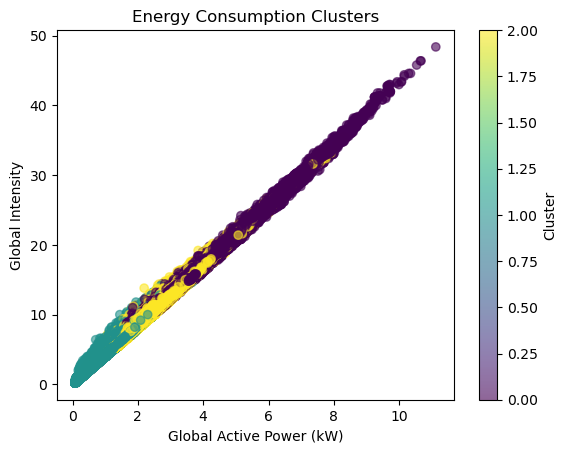

In [71]:
# Visualize clusters
import matplotlib.pyplot as plt
plt.scatter(df['Global_active_power'], df['Global_intensity'], c=clusters, cmap='viridis', alpha=0.6)
plt.title('Energy Consumption Clusters')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Global Intensity')
plt.colorbar(label='Cluster')
plt.show()

In [73]:
# measure to evaluate clustering performance is the Calinski-Harabasz Index (higher is better)

from sklearn.metrics import calinski_harabasz_score

calinski_score = calinski_harabasz_score(X_cluster, clusters)
print(f"Calinski-Harabasz Score: {calinski_score:.4f}")

Calinski-Harabasz Score: 527252.7498


In [75]:
# This index measures cluster separation and compactness (lower is better):

from sklearn.metrics import davies_bouldin_score

davies_score = davies_bouldin_score(X_cluster, clusters)
print(f"Davies-Bouldin Score: {davies_score:.4f}")

Davies-Bouldin Score: 1.5223


In [ ]:
# from sklearn.metrics import silhouette_samples

# silhouette_values = silhouette_samples(X_cluster, clusters)
# print(silhouette_values)  # Individual silhouette scores